# Worked Example of the Spec Pipeline on HST Data
Author: Kayli Glidic

## Import Library

In [2]:
#import the module
from pipeline import spec_pipeline

import matplotlib.pyplot as plt
%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

#import yaml to read in the parameter file
import yaml

Loading BokehJS ...

## CoRoT-1b Spectroscopic Data

   First, it will be helpful to read in the desired parameterfile to refer back to. Note, you should create and edit a parameter file similar to the one displayed below. 

In [17]:
with open("corot1_firsttransit.yaml", "r") as stream:
    paramfile = yaml.safe_load(stream)
    
paramfile

{'procFiles': '/surtrdata1/tso_analysis/hst/corot1/*_flt.fits',
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': 'all_visits',
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[9, 32], [41, 49], [92, 122]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADextension': 0,
 'isSlope': True,
 'readNoise': 20,
 'detectorGain': 1.0,
 'dateFormat': 'Two Part',
 'itimeKeyword': 'EXPTIME'}

To analyze, the spectroscopic data of any target, read in the desired parameter file. After installing tshirt, import the module `spec_pipeline` from `pipeline`. Note that here, we define an object `spec` however, the name can vary. Calling the command `help(spec_pipeline.spec)` might be helpful to ensure the right keywords in the argument are called. For example, when utilizing the `spec_pipeline.spec` method from the Spectroscopic module, the keyword used is `paramFile`. 

In [20]:
spec = spec_pipeline.spec(paramFile='corot1_firsttransit.yaml')

Before performing the extraction of the spectroscopic data from the spectroscopic images, call `showStarChoices`. `showStarChoices` is a method of the spec object in the spectroscopic module found in tshirt and the command `help(showStarChoices)` can help define the relevant keywords. This `showStarChoices` is used to view apertures and setting the keyword `showPlot=True` will display the plot within the Jupyter notebook space. 


The plot displayed will have the axes in terms of the location on the instrument detector (X & Y pixels). The color bar depicts the number of counts at each pixel. Lastly, there will be a red rectangular aperture enclosing the source as well as red shaded rectangular areas depicting the background subtraction areas. 

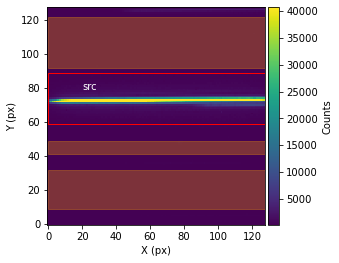

In [21]:
spec.showStarChoices(showPlot=True)

After checking the apertures, call `do_extraction`. `do_extraction` is a method of the spec object in the spectroscopic module found in tshirt, and the command `help(do_extraction)` can help define the relevant keywords. Calling `do_extraction` will perform the extraction of spectroscopic data from all the spectroscopic images found in the parameter file defined. `do_extraction` will extract all spectroscopy. Within the argument of the method, set `useMultiproccessing=True` to run the code faster by using more CPUs. 

In [22]:
spec.do_extraction(useMultiprocessing=True)

On 0 of 392
On 60 of 392
On 90 of 392
On 30 of 392
On 15 of 392
On 45 of 392
On 75 of 392
On 120 of 392
On 150 of 392
On 180 of 392
On 105 of 392
On 135 of 392
On 165 of 392
On 195 of 392
On 210 of 392
On 240 of 392
On 270 of 392


/home/kglidic/Software/tser_tools/tshirt/pipeline/phot_pipeline.py:2057: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 225 of 392
On 255 of 392
On 285 of 392
On 300 of 392
On 330 of 392
On 360 of 392
On 390 of 392
On 315 of 392
On 345 of 392
On 375 of 392


To plot the spectrum of the source, call 'plot_one_spec' which is a method of the spec object in the spectroscopic module found in tshirt. 

The plot displayed will have an x-axis in terms of X pixel location on the detector and a y-axis in terms of counts(e-). In this particular data, each pixel was already converted to be terms of (DN/s), a value of flux. However, this method `plot_one_spec` converts this flux value back into counts for easier calculations of uncertainty down the line. The plot also depicts two distinct plots of an "optimal" extraction and "sum" extraction defined by a legend. The "optimal" extraction is essentially a weighted sum of the counts in each row in the spectroscopic images while the other is an unweighted sum. The "optimal" extracted spectrum chooses weights to result in the least amount of noise.  

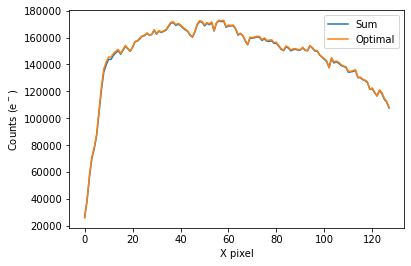

In [23]:
spec.plot_one_spec()

To plot the light curve of each visit, call `plot_wavebin_series`, a method of the spec object in the spectroscopic module found in tshirt. Calling `plot_wavebin_series` essentially takes the summation of all the pixel flux values enclosed within the source aperture (taking into account background subtraction) that the method `do_extraction` gathered prior. Within the argument of the method, set `interactive=True` to navigate the plot within the notebook space. By default, the argument `nbins=10` but, altering `nbins` controls how many wavelength-binned time series are plotted. To define more of the parameters call the command `help(plot_wavebin_series)`.

Displayed on the plot, the x-axis will be time and the y-axis will be the normalized flux value. 

In [24]:
spec.plot_wavebin_series(nbins=1,savePlot=False, interactive=True)

To plot the dynamic spectrum, call `plot_dynamic_spec`, a method of the spec object in the spectroscopic module found in tshirt. Calling `plot_dynamic_spec` essentially displays a plot depicting the change in the spectrum over time. Within the argument of the method, set `showPlot=True` to display the plot within the Jupyter notebook space. To define more of the parameters call the command `help(plot_dynamic_spec)`.

Displayed in the image will be two plots. The plot on top displays the average spectrum overall. The 2D plot on the bottom displays how the spectrum changes over time. On the x-axis is the dispersion and on the y-axis is the time which correlates to the image number. Finally, the color bar displays the normalized flux which can identify the transit of an exoplanet. Displayed below are four visits visible as horizontal bands. The band located at the bottom, which is the first visit, on the plot is the visit featuring the transit. 

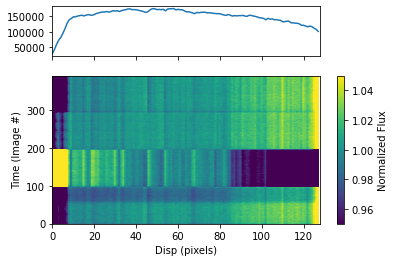

In [25]:
spec.plot_dynamic_spec(showPlot=True)

## CoRoT-1b Batch Processing the Spectroscopic Data

A batch object can iterate over any method the spectroscopic module found in tshirt. To perform batch processing, this is the general syntax for the code to run: `bspec.batch_run('method')`. Start by creating a batch parameter file from a normal spec parameter file. Turn parameters unique to each iteration into lists. For example, the `procFiles`, `nightName`, and `bkgRegionsY` (background regions) have been customized for the four visits. Next, read in the batch parameter file. 

In [26]:
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)
    
bparamfile

{'procFiles': ['/home/kglidic/Software/tser_tools/tshirt/corot1_visit1/*_flt.fits',
  '/home/kglidic/Software/tser_tools/tshirt/corot1_visit2/*_flt.fits',
  '/home/kglidic/Software/tser_tools/tshirt/corot1_visit3/*_flt.fits',
  '/home/kglidic/Software/tser_tools/tshirt/corot1_visit4/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,

To analyze, the spectroscopic data of any target, read in the desired parameter file. After installing tshirt, import the module `spec_pipeline` from `pipeline`. Note that here, we define an object `bspec` however, the name can vary. Calling the command `help(spec_pipeline.batch_spec)` might be helpful to ensure the right keywords in the argument are called. For example, when utilizing the `spec_pipeline.batch_spec` method from the spectroscopic module, the keyword used is `batchFile`. 

In [27]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml')

Before performing the extraction of the spectroscopic data from the spectroscopic images, call `showStarChoices`. `showStarChoices` is a method of the spec object in the spectroscopic module found in tshirt and the command `help(showStarChoices)` can help define the relevant keywords. This `showStarChoices` is used to view apertures and setting the keyword `showPlot=True` will display the plot within the Jupyter notebook space. The keyword `vmax` defines the maximum value for imshow. 

Since this is a batch parameter file, there should be a plot displayed for each distinguished visit. These plots displayed will have the axes in terms of the location on the detection instrument (X & Y pixels). The color bar depicts the number of counts at each pixel. Lastly, there will be a red rectangular aperture enclosing the source as well as red shaded rectangular areas depicting the background subtraction areas. 

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


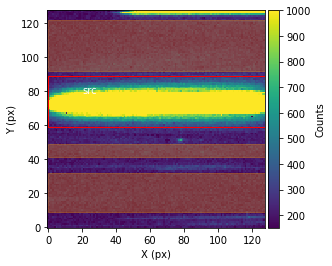

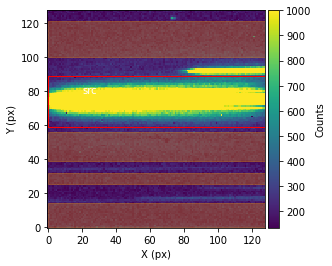

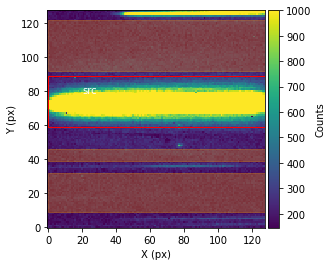

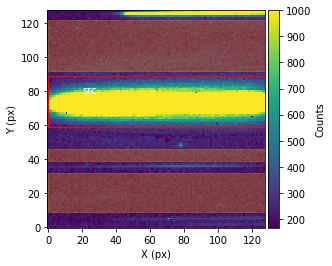

In [28]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True)

After checking the apertures, call `do_extraction`. `do_extraction`  is a method of the spec object in the spectroscopic module found in tshirt, and the command `help(do_extraction)` can help define the relevant keywords. Calling `do_extraction` will perform the extraction of spectroscopic data from all the spectroscopic images found in the batch parameter file defined. `do_extraction` will extract all spectroscopy. Within the argument of the method, set `useMultiproccessing=True` to run the code faster by using more CPUs. 

In [29]:
bspec.batch_run('do_extraction',useMultiprocessing=True)

Working on do_extraction for batch CoRoT-1 corot1_visit1 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit2 


On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit3 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98


/home/kglidic/Software/tser_tools/tshirt/pipeline/phot_pipeline.py:2057: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit4 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


To plot the spectrum of the source for all visits, call `plot_one_spec` which is a method of the spec object in the spectroscopic module found in tshirt.

The plots displayed will have an x-axis in terms of X pixel location on the detector and a y-axis in terms of counts(e-). In this particular data, each pixel was already converted to be terms of (DN/s), a value of flux. However, this method `plot_one_spec` converts this flux value back into counts for easier calculations of uncertainty down the line. The plot also depicts two distinct plots of an "optimal" extraction and "sum" extraction defined by a legend. The "optimal" extraction is essentially a weighted sum of the counts in each row in the spectroscopic images while the other is an unweighted sum. The "optimal" extracted spectrum chooses weights to result in the least amount of noise. For bright sources like this example, the sum and optimal extractions will give very similar results. 

Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


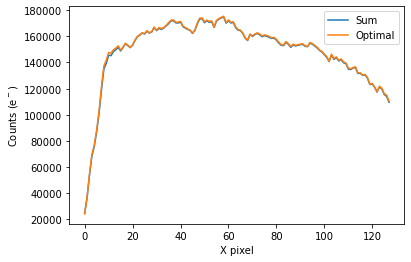

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


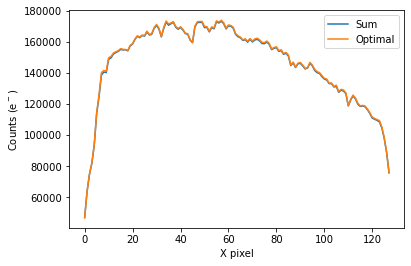

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


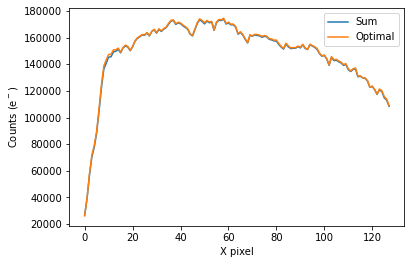

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


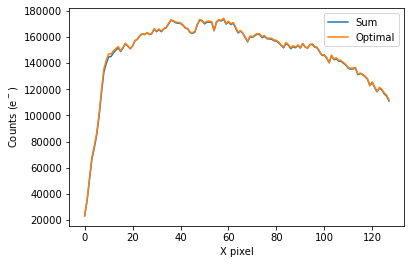

In [30]:
bspec.batch_run('plot_one_spec')

To plot the light curve of each visit separately with a batch file, call `plot_wavebin_series`, a method of the spec object in the spectroscopic module found in tshirt. Calling `plot_wavebin_series` essentially takes the summation of all the pixel flux values enclosed within the source aperture (taking into account background subtraction) that the method `do_extraction` gathered prior. Within the argument of the method, set `interactive=True` to navigate the plot within the notebook space. By default, the argument `nbins=10` but, altering `nbins` controls how many wavelength-binned time series are plotted. To define more of the parameters call the command `help(plot_wavebin_series)`.

Displayed on the plot, the x-axis will be time and the y-axis will be the normalized flux value. 

In [31]:
bspec.batch_run('plot_wavebin_series', nbins=1, interactive=True)

Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


To plot the dynamic spectrum for each visit separately, call `plot_dynamic_spec`, a method of the spec object in the spectroscopic module found in tshirt. Calling `plot_dynamic_spec` essentially displays a plot depicting the change in the spectrum over time. Within the argument of the method, set `showPlot=True` to display the plot within the Jupyter notebook space. To define more of the parameters call the command `help(plot_dynamic_spec)`.

Displayed in each image will be two plots. The plot on top displays the average spectrum overall. The 2D plot on the bottom displays how the spectrum changes over time. On the x-axis is the dispersion and on the y-axis is the time which correlates to the image number. Finally, the color bar displays the normalized flux which can identify the transit of an exoplanet. In this example for a batch file, each visit has a separate dynamic spectrum plotted.

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


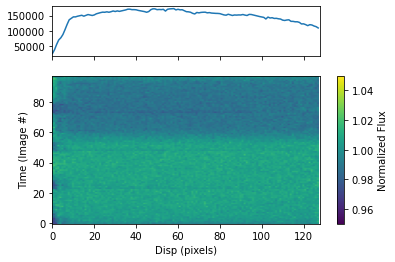

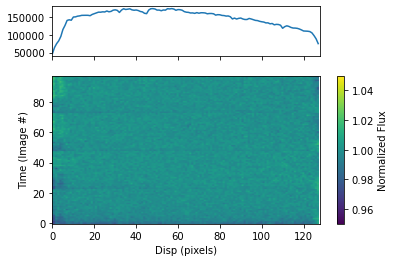

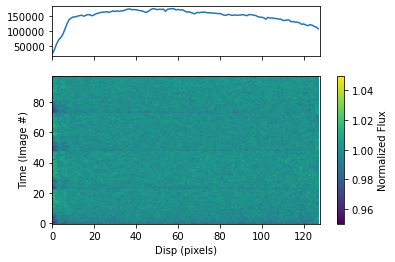

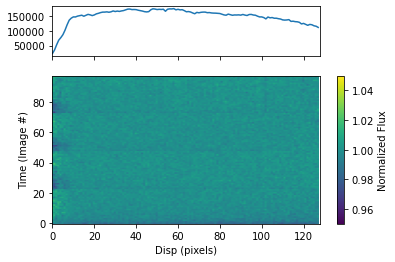

In [32]:
bspec.batch_run('plot_dynamic_spec', showPlot=True)